## Title: Project 7: Apply Supervised Machine Learning - Simple Linear Regression
### Author: Tesfamariam
### Link: https://github.com/Tesfamariam100/datafun-07-applied


### dependancies


In [110]:
import matplotlib
from matplotlib import pyplot as plt
import pandas
import pyarrow
import scipy
from scipy import stats
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np

### Part 1 - Chart a Straight Line

#### Linear Relationships

Linear relationships exist between Fahrenheit and Celsius temperatures, where Celsius (dependent variable) is determined by Fahrenheit (independent variable) through the formula c = 5/9 ×(f−32). Plotting Fahrenheit against Celsius yields a straight line, demonstrated by computing Celsius equivalents for Fahrenheit temperatures 0–100 in 10-degree intervals and storing them as tuples in 'temps'

#### Visualizing Fahrenheit and Celsius Temperature Relationships

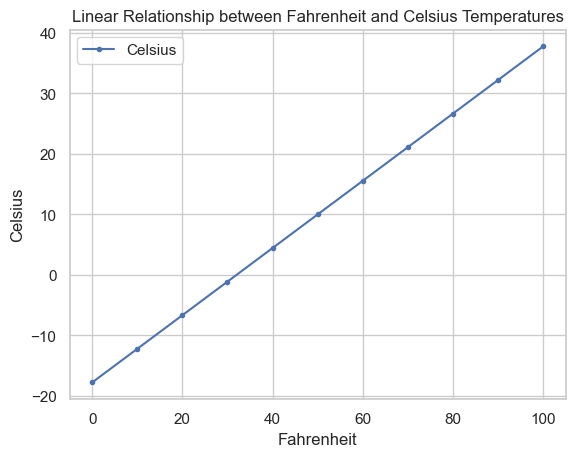

In [111]:
c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]
[(f, c(f)) for f in range(0, 101, 10)]

#place the data in a DataFrame
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')
plt.title('Linear Relationship between Fahrenheit and Celsius Temperatures')

# Add a grid
plt.grid(True)

## (Part 2) - Predict Avg High Temp in NYC in January 

### Section 1 - Data Acquisition

In [112]:
#loading and displaying the New York City data from ave_hi_nyc_jan_1895-2018.csv
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


### Section 2 - Data Inspection

Examine the DataFrame’s head and tail to understand the data:

In [113]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [114]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

Seaborn will graph Date-Value pairs and a regression line, automatically labeling axes using DataFrame column names. To enhance readability, we'll change the name of the 'Value' column to 'Temperature'.

In [115]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


### Section 2 - Data Inspection

Seaborn labels x-axis tick marks with Date values. To improve readability for January temperatures, we'll remove "01" from each Date.

In [116]:
nyc.Date.dtype

dtype('int64')

checking the column type ('int64') which is integer, dividing by 100 removes the last two digits.

In [117]:
# Using the Series method floordiv applies integer division to each element within the Series:

nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)


,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

To obtain quick statistics regarding the dataset's temperatures, use the `describe` function on the 'Temperature' column. 

In [118]:
### Calculating Basic Descriptive Statistics

# Set precision to 2 decimal places
pd.set_option('display.precision', 2)

# Calculate basic descriptive statistics using describe
nyc['Temperature'].describe()


count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

Use the SciPy stats module's linregress function to calculate the slope and intercept for the best fit line through the data.



In [119]:
# Calculate the slope and intercept of the regression line
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)
# Obtain the slope of the linear regression
linear_regression.slope

0.014771361132966163

In [120]:
# Linear Regression Intercept
linear_regression.intercept

8.694993233674289

### Section 6 - Predict

Utilize your model to predict the "average high temperature in January" for the year 2024, similar to the process done for 2019.


In [121]:
# Predict the average high temperature in January for the year 2024 using the linear regression model
linear_regression.slope * year_2024 + linear_regression.intercept
predicted_temperature_2024

38.5922281667978

In [122]:
# We also can approximate what the average temperature might have been in the years before 1895.

linear_regression.slope * 1890 + linear_regression.intercept


36.612865774980335

In [123]:
# We should expect predictions become less reliable as you move further beyond this range.

### Section 7 - Visualizations

Plotting Average High Temperatures and Regression Line:
Using Seaborn regplot function we'll visualize data points with dates on the x-axis and temperatures on the y-axis. Blue dots represent temperatures for dates, while a straight regression line runs through the points.


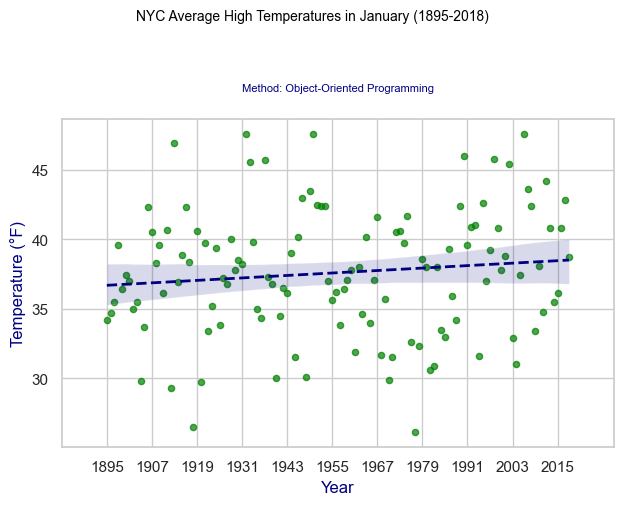

In [124]:

# Set Seaborn theme and customize scatter plot and regression line
sns.set_theme(style='whitegrid')

# Create the scatter plot with regplot
axes = sns.regplot(x='Date', y='Temperature', data=nyc,
                   scatter_kws={"color": "green", "alpha": 0.7, "s": 20, "marker": "o"},
                   line_kws={"color": "navy", "lw": 2, "ls": "--"})

# Add title, subtitle, and labels to the plot
plt.suptitle('NYC Average High Temperatures in January (1895-2018)', fontsize=10, color='Black', y=1.05)
axes.set_title('Method: Object-Oriented Programming', fontsize=8, color='navy', pad=20)
axes.set_xlabel('Year', fontsize=12, color='navy')
axes.set_ylabel('Temperature (°F)', fontsize=12, color='navy')

# Customize ticks and extend the chart horizontally
axes.set_xticks(range(min(nyc.Date), max(nyc.Date), 12)) 
axes.set_xlim(min(nyc.Date) - 12, max(nyc.Date) + 12)

# Display the plot
plt.tight_layout()
plt.show()


**Analysis:**
NYC January High Temperature Trends (1895-2018)

The plot illustrates a generally increasing trend in average high temperatures in January for NYC from 1895 to 2018, with some fluctuations observed over the years.

## Part 3 - Predict Avg High Temp in NYC in January

### Section 1 - Build the Model

Let’s split the data into training and testing sets.

In [125]:
from sklearn.model_selection import train_test_split
In [7]: X_train, X_test, y_train, y_test = train_test_split(
nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
random_state=11)

To validate the 75%–25% train-test split, we can verify the shapes of X_train and X_test.

In [126]:
X_train.shape

(93, 1)

In [127]:
X_test.shape

(31, 1)

Let's train a LinearRegression estimator

In [128]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train),

(LinearRegression(),)

#### Linear Regression Estimation

After training the estimator, use the `fit` method to get its string representation.

The `LinearRegression` estimator iteratively adjusts slope and intercept values to minimize the sum of squares of data points' distances from the lion.

Access the estimator's `coef_` for slope (m) and `intercept_` for intercept (b) in the y = mx + b calculation.


In [129]:
linear_regression.coef_

array([0.01939167])

In [130]:
linear_regression.intercept_

-0.30779820252656975

### Section 2 - Test the Model

Utilize the data in X_test to test the model. Display predicted and expected values for every fifth element in the dataset to assess predictions.


In [131]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

Utilize the coefficient and intercept values to predict the January 2019 average high temperature and estimate the average high temperature in January 1890. The lambda function below implements the equation for a line y = mx + b, with coef_ as m and intercept_ as b.


In [132]:
predict = (lambda x: linear_regression.coef_ * x +
    linear_regression.intercept_)
predict(2024)

array([38.94094855])

### Section 4 - Visualizations


Create a scatter plot of the dataset using Seaborn's scatterplot function with the nyc DataFrame

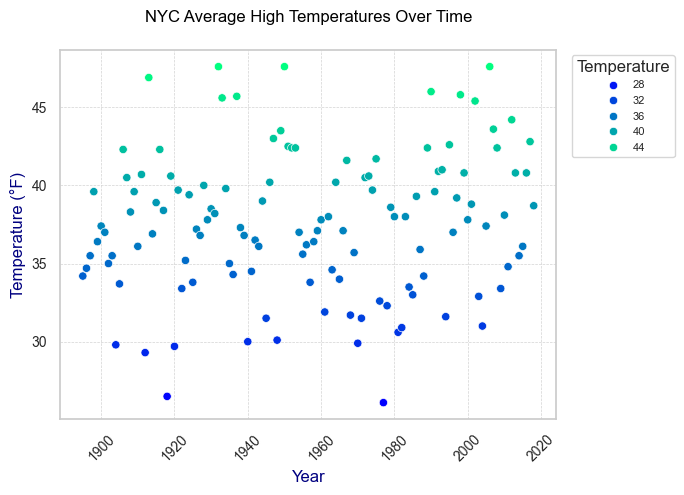

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot with custom elements
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter')

# Set title and labels
plt.title('NYC Average High Temperatures Over Time', fontsize=12, color='Black', pad=20)
plt.xlabel('Year', fontsize=12, color='navy')
plt.ylabel('Temperature (°F)', fontsize=12, color='navy')

# Add gridlines
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Customize ticks
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Show legend with adjusted parameters
plt.legend(title='Temperature', loc='upper right', fontsize=8, bbox_to_anchor=(1.25, 1))

# Show plot
plt.show()


## (Part 4) - Insights

| Aspect                 | Simple Linear Regression (SLR)                                    | Scikit-learn Estimator                                           |
|------------------------|-------------------------------------------------------------------|------------------------------------------------------------------|
| **Application**        | Used in Chapter 10.16 to predict NYC average January temperatures based on historical data from 1895 to 2018. | Reimplemented in Chapter 15.4 using scikit-learn for predictive modeling. |
| **Prediction Accuracy**| Predicted NYC January temperatures for 2024 and estimated those for 1890 with reasonable accuracy. | Provided slightly improved predictions compared to SLR.             |
| **Model Complexity**   | Basic linear model with one parameter (slope), suitable for establishing linear relationships. | Can handle more complex relationships between variables, offering enhanced flexibility. |
| **Model Selection**    | Suitable for straightforward analysis, especially when simplicity is preferred. | Offers more advanced modeling capabilities, ideal for datasets with intricate relationships. |
| **Considerations**     | May lack sophistication for datasets with complex relationships or non-linear trends. | Provides a broader range of algorithms and tools, allowing for more intricate analyses. |
| **Decision Factors**   | Trade-off between simplicity and performance; ideal for basic linear relationships. | Depends on the complexity of dataset relationships and analysis goals, favors performance and flexibility. |


In conclusion, both SLR and the scikit-learn estimator serve as valuable tools for predictive modeling, each with its own strengths and considerations. Understanding the nature of the dataset and the requirements of the analysis is crucial in selecting the appropriate modeling approach for a given task.

### Part 5 - Bonus

Case Study: Multiple Linear Regression with the California Housing Dataset

#### Loading the Data

Load the dataset get familiar with it. The fetch_california_housing function from the sklearn.datasets module returns a Bunch object containing the data and other information about the dataset:

In [3]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [4]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
california.data.shape

(20640, 8)

In [6]:
california.target.shape

(20640,)

The attribute feature_names of The Bunch comprises the names corresponding to each column within the data array.

In [8]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

#### Exploring the Data with Pandas

In [9]:
import pandas as pd
# Maximum number of digits to display to the right of the decimal point
pd.set_option('display.precision', 4)

# Maximum number of columns to display in DataFrame's output string rep
pd.set_option('display.max_columns', 9)

# Telling pandas to autodetect width
pd.set_option('display.width', None)

**We are creating a DataFrame from the Bunch’s data, target and feature_names arrays.**

In [10]:
# Creating the initial DataFrame using the data in california.data and with the column names specified by california.feature_names
california_df = pd.DataFrame(california.data,
    columns=california.feature_names)

# Adding a column for the median house values stored in california.target
california_df['MedHouseValue'] = pd.Series(california.target)

# Using head function to view snapshot of dataframe
california_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


The summary statistics of the DataFrame to understand the data distribution in each column.

In [11]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


### Visualizing the Features

We will use DataFrame method sample to randomly select 10% of the 20,640 samples
for graphing purposes:

In [14]:
sample_df = california_df.sample(frac=0.1, random_state=17)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')

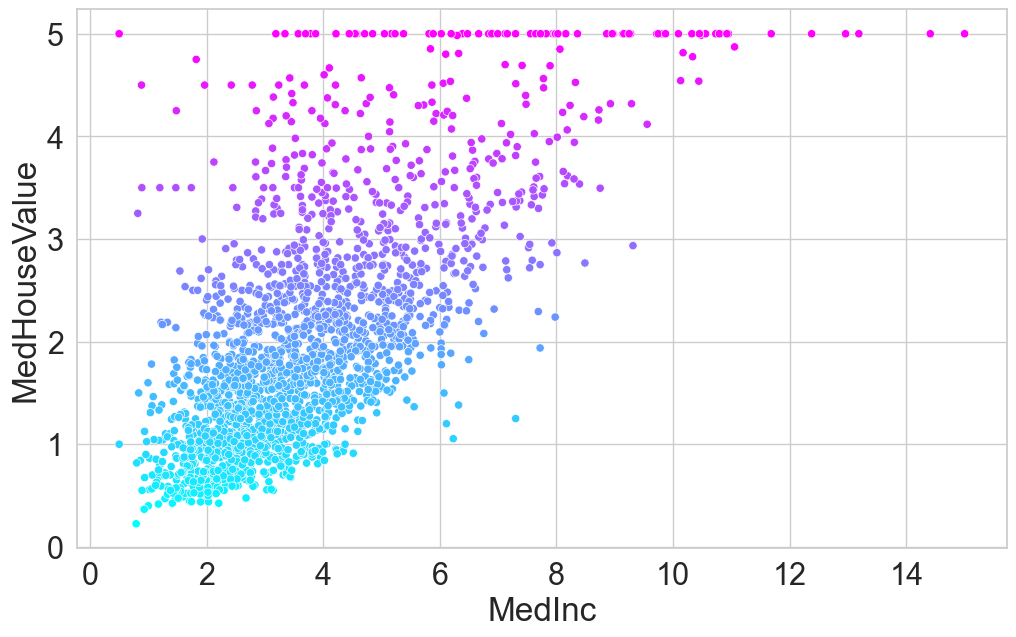

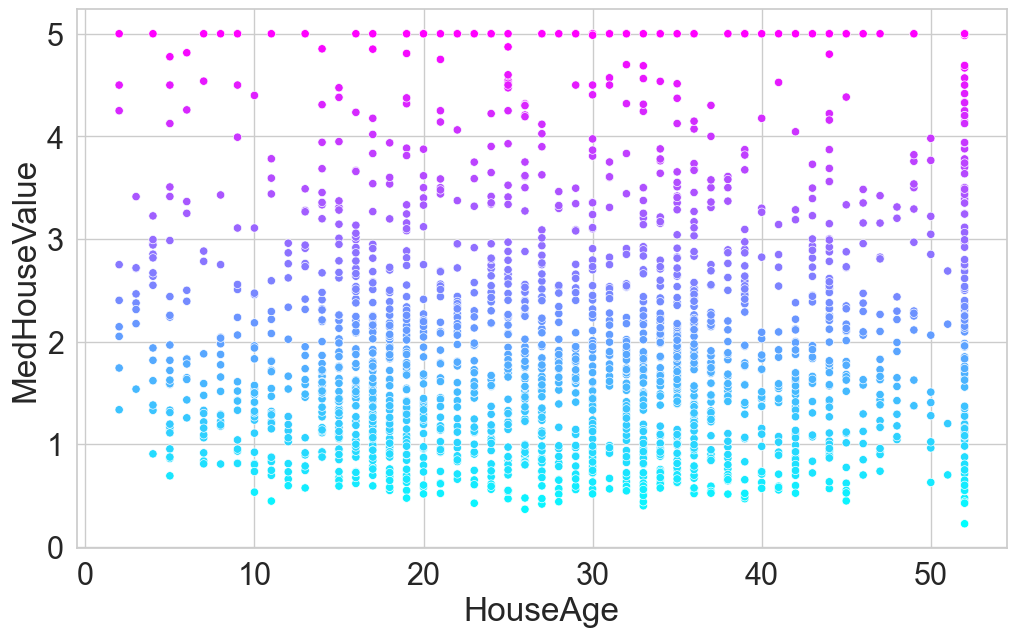

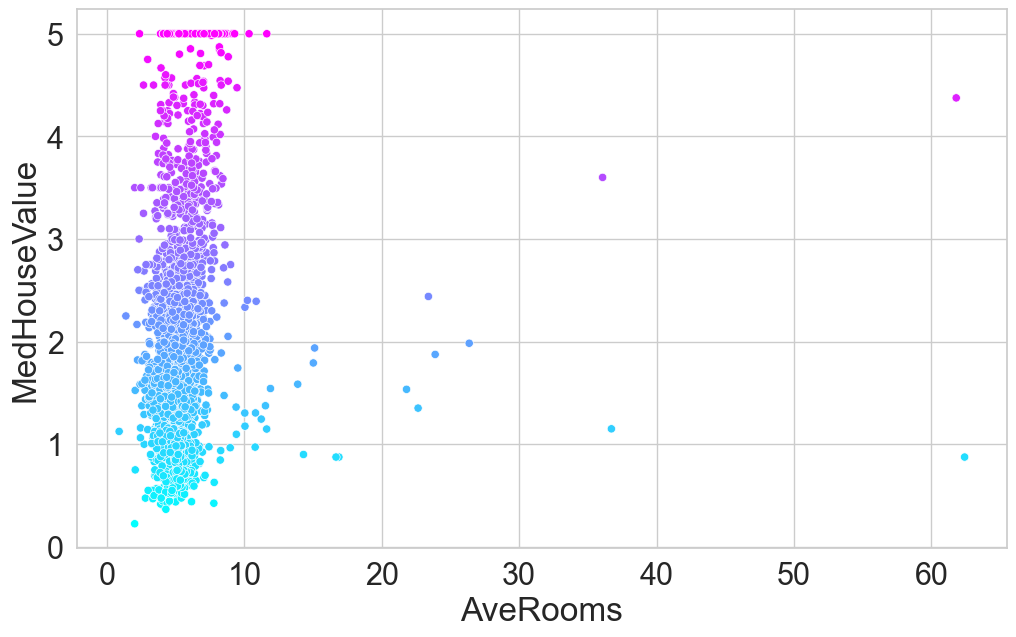

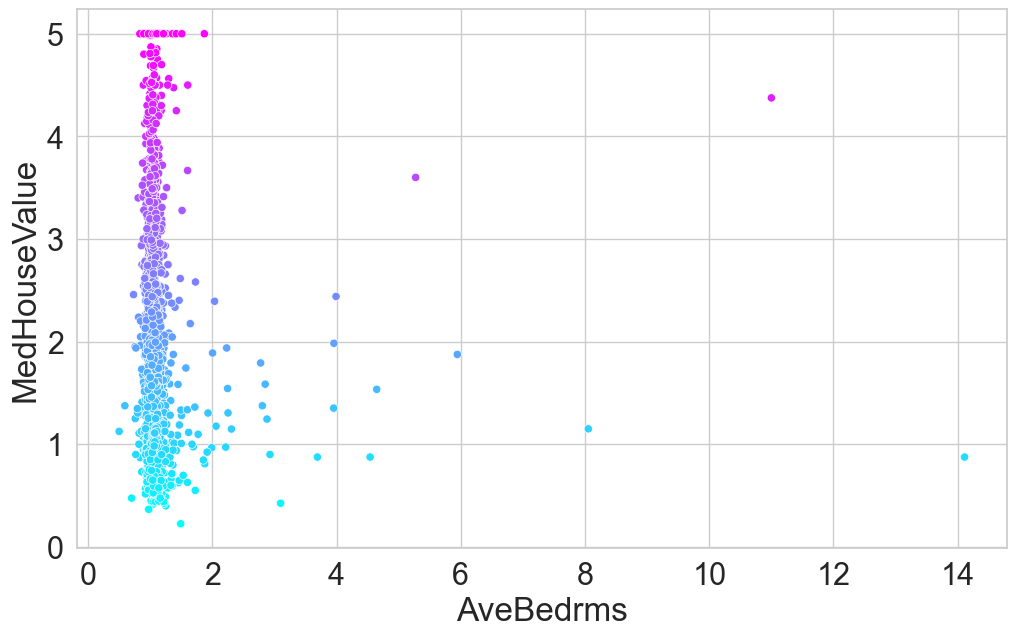

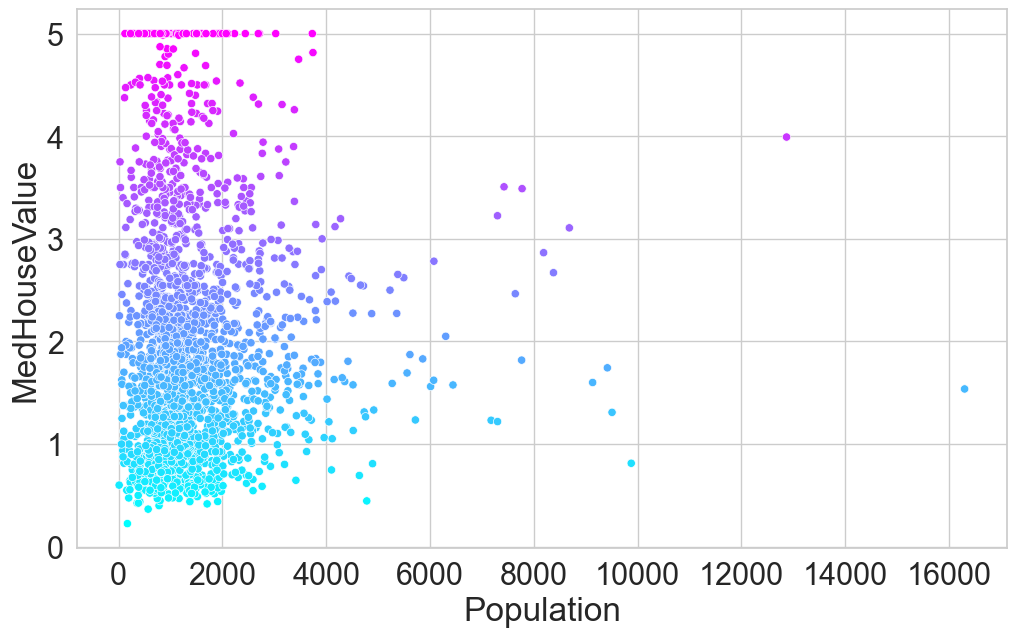

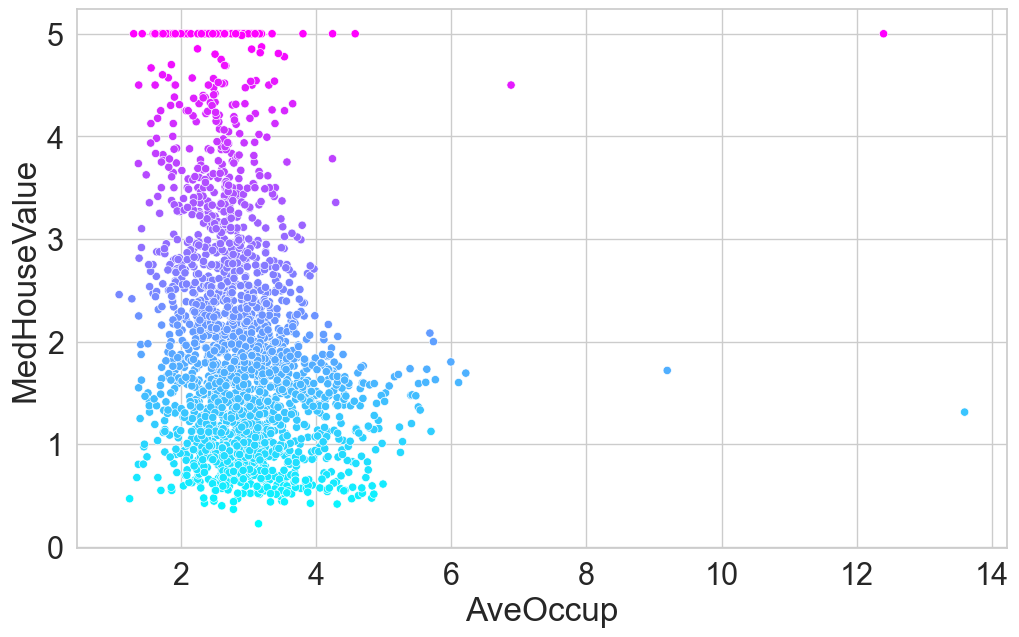

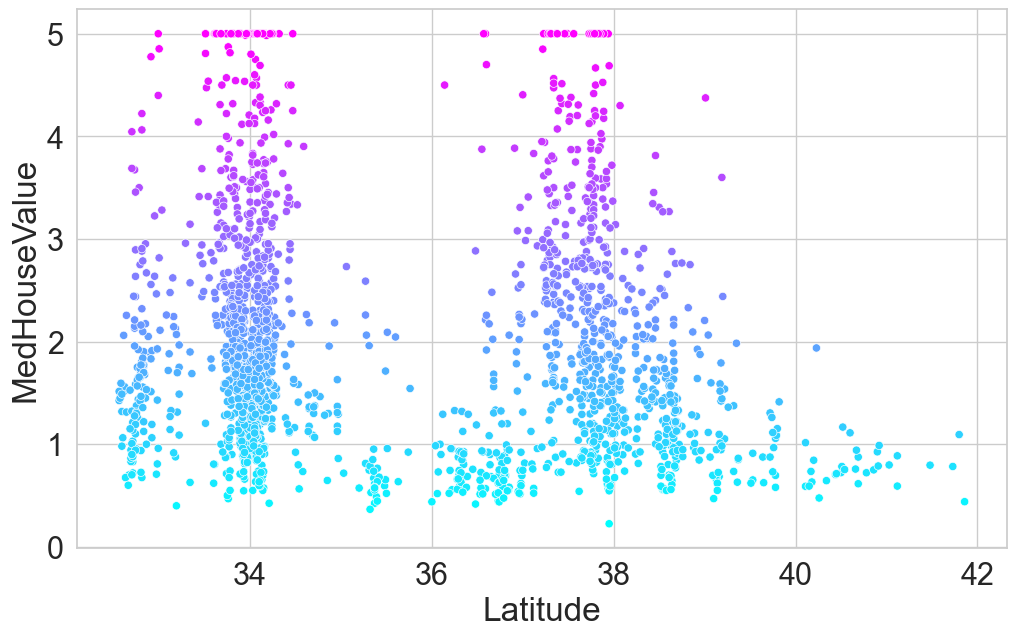

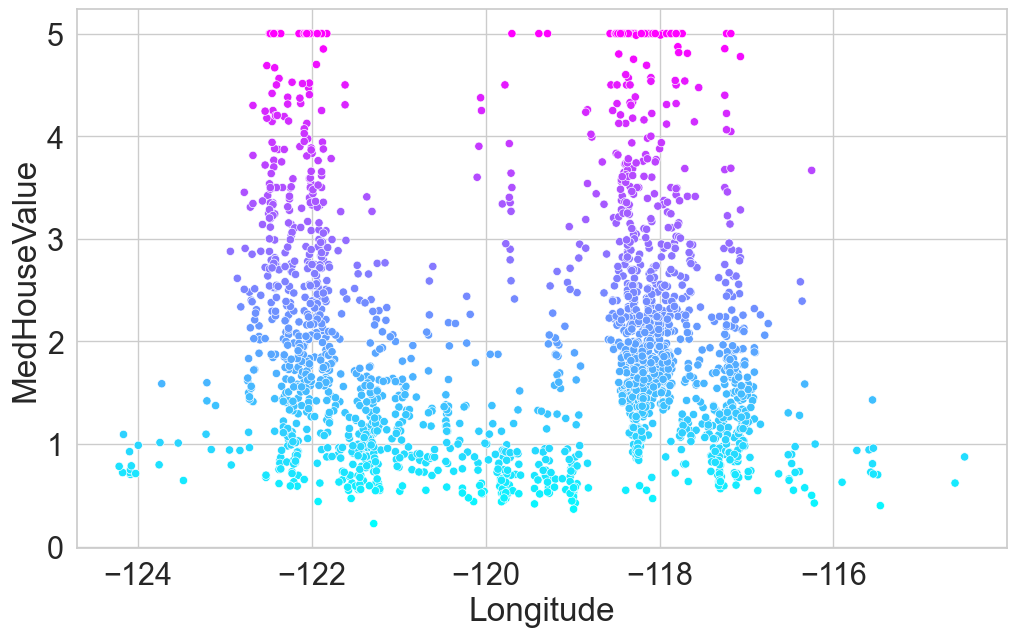

In [18]:
for feature in california.feature_names:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=sample_df, x=feature,
                    y='MedHouseValue', hue='MedHouseValue',
                    palette='cool', legend=False)

### Splitting the Data for Training and Testing

To facilitate model training and testing, let's split the data into training and testing sets using train_test_split function and verify their sizes.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
california.data, california.target, random_state=11)

X_train.shape
(15480, 8)
X_test.shape
(5160, 8)


(5160, 8)

Note: We used **train_test_split’s** keyword argument random_state to seed the random number
generator for reproducibility.

### Training the Model

We'll train the model using LinearRegression, which typically employs all numeric features. Errors may arise if categorical features are present instead.
Create a LinearRegression estimator and train it using X_train and y_train by invoking its fit method.

In [26]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

Multiple linear regression generates distinct coefficients for each feature (stored in coeff_) in the dataset and a single intercept (stored in intercept_).

In [34]:
for i, name in enumerate(california.feature_names):
    (f'{name:>10}: {linear_regression.coef_[i]}')

MedInc: 0.4377030215382206
HouseAge: 0.009216834565797713
AveRooms: -0.10732526637360985
AveBedrms: 0.611713307391811
Population: -5.756822009298454e-06
AveOccup: -0.0033845664657163703
Latitude: -0.419481860964907
Longitude: -0.4337713349874016
linear_regression.intercept_



-36.882950656055485

Positive coefficients indicate higher median house values with increasing features, while negative coefficients imply the opposite trend. The population coefficient, nearly zero, suggests minimal influence on the median house value.

### Testing the Model

Next, we test the model using the estimator's predict method with the test samples. Predictions are stored in 'predicted', and expected values are in 'expected'.


In [35]:
predicted = linear_regression.predict(X_test)
expected = y_test

Examining the initial five predictions alongside their respective expected values.

In [38]:
predicted[:5]
([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

expected[:5]

array([0.762, 1.732, 1.125, 1.37 , 1.856])

### Visualizing the Expected vs. Predicted Prices

Examining the expected versus predicted median house values for the test data involves creating a DataFrame with columns for both expected and predicted values.

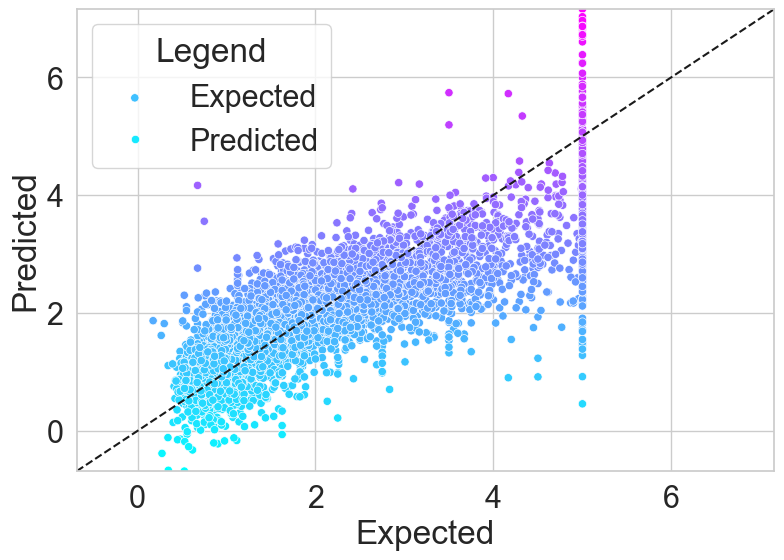

In [48]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)
 # Plotting the data as a scatter plot with the expected (target) prices along the x-axis and the predicted prices along the y-axis
figure = plt.figure(figsize=(9, 6))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
    hue='Predicted', palette='cool', legend=True)

# Setting the x- and y-axes’ limits to use the same scale along both axes
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')
# Displaying the legend
plt.legend(title='Legend', loc='upper left', labels=['Expected', 'Predicted'])

**Observation:** As the expected median house value increases, more predicted values tend to fall below the line, indicating a trend of lower predictions with higher expected values.

### Regression Model Metrics

One essential metric for regression estimators is the coefficient of determination, known as the R2 score. To compute an estimator’s R2 score, use the r2_score function from the sklearn.metrics module, passing the arrays representing the expected and predicted results as arguments.

In [49]:
from sklearn import metrics
metrics.r2_score(expected, predicted)

0.6008983115964333

To calculate an estimator’s mean squared error, call function mean_squared_error (from
module sklearn.metrics) with the arrays representing the expected and predicted results:

In [50]:
metrics.mean_squared_error(expected, predicted)


0.5350149774449119

When assessing estimators using the mean squared error metric, the one with a value closest to 0 is the best fit for your data.

### Choosing the Best Model

Let's test various estimators to see if any outperform the LinearRegression estimator. We'll use ElasticNet, Lasso, and Ridge regression estimators, along with the linear_regression estimator from sklearn.linear_model.



In [51]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

We'll use k-fold cross-validation with a KFold object and cross_val_score to evaluate estimators. 'scoring='r2'' is passed to report R2 scores for each fold. LinearRegression and Ridge appear to be the best models for this dataset, with 1.0 indicating the best score.



In [52]:
from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
                             X=california.data, y=california.target, cv=kfold,
                             scoring='r2')
    print(f'{estimator_name:>16}: ' +
          f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599


## Part 6 References
- Guided projects located in sections 10.16 and 15.4 of the textbook titled "Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud.
- Consultation with OpenAI occurred throughout this analysis to aid in project design, coding and syntax structure, as well as to validate various assumptions